# kmeans no Seaborn com os Penguins

In [1]:
# Desativar avisos de expiração
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import scipy
import seaborn as sns
import numpy as np
from scipy.cluster.vq import vq, kmeans, whiten
import matplotlib.pyplot as plt

In [3]:
df=sns.load_dataset('penguins')

In [4]:
# Insere a Mediana para os nulos
df.fillna(df.select_dtypes(include=[float, int]).median(), inplace=True)

In [5]:
# Lista as colunas com nulo // tem que vir tudo zerado
print(df.isnull().sum())

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64


In [6]:
# Corrigir os tipos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

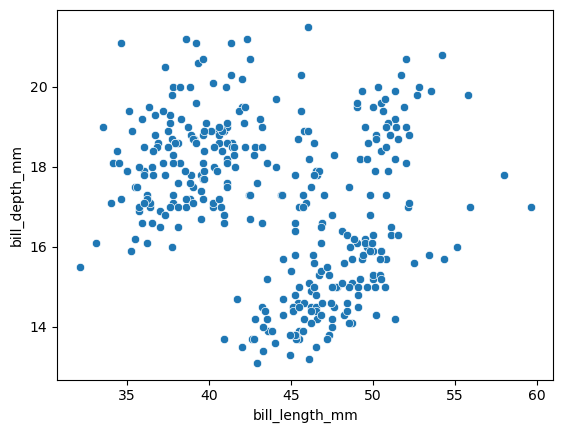

In [9]:
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm')

Text(0.5, 1.0, 'Conhecendo os grupos')

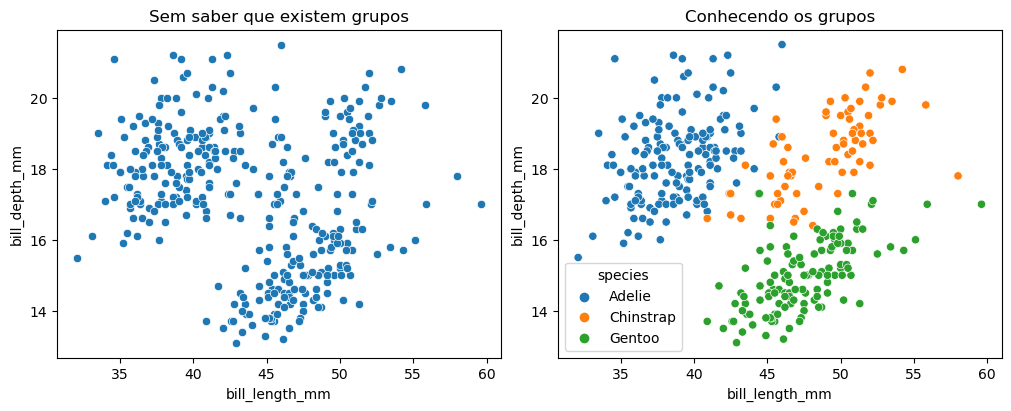

In [10]:
# Mostrar os dois gráficos uma ao lado do outro, um sem o hue para mostrar que não teria como adivinhar os grupos
fig, g = plt.subplots(ncols=2, figsize=(10, 4), layout='constrained')

# Gráfico da esquerda
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', ax=g[0])
g[0].set_title('Sem saber que existem grupos')
# Gráfico da direita
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', ax=g[1])
g[1].set_title('Conhecendo os grupos')

In [11]:
df.head(1)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male


In [12]:
# Definimos uma matriz "X" retirando os campos String.
X = df[df.columns.difference(['species','island','sex'])].values

print("Exemplo de caracteristicas do df: {}".format(X[0]))
#Exemplo de caracteristicas da flor: [1.4 0.2 5.1 3.5]

Exemplo de caracteristicas do df: [  18.7   39.1 3750.   181. ]


In [13]:
# Exemplo de um registro
X[1]

array([  17.4,   39.5, 3800. ,  186. ])

In [14]:
# Exemplo de um registro
X[2]

array([  18. ,   40.3, 3250. ,  195. ])

In [15]:
X.shape

(344, 4)

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
# Aqui que é feito o treinamento ( fit recebe o 'X' que são os valores em análise para se chegar nos 3 grupos)
kmeans.fit(X)


KMeans(n_clusters=3)

In [17]:
kmeans.cluster_centers_

array([[  17.9974026 ,   41.01623377, 3487.17532468,  189.5       ],
       [  17.10086207,   44.66810345, 4378.87931034,  203.59482759],
       [  15.47297297,   48.81351351, 5407.09459459,  220.36486486]])

In [18]:
# Inluir a coluna de Cluster
df['Cluster'] = kmeans.labels_
df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Cluster
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0


In [19]:
df.groupby('Cluster').count()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
Cluster,,,,,,,
0,154,154,154,154,154,154,150
1,116,116,116,116,116,116,109
2,74,74,74,74,74,74,74


In [20]:
# Buscar valores de min e max para os grupos
df.groupby('Cluster').describe().T

Cluster                            0            1            2
bill_length_mm    count   154.000000   116.000000    74.000000
                  mean     41.016234    44.668103    48.813514
                  std       5.364730     4.147883     2.977878
                  min      32.100000    34.600000    42.600000
                  25%      37.000000    41.675000    46.725000
                  50%      39.400000    44.500000    49.050000
                  75%      45.575000    47.000000    50.400000
                  max      58.000000    55.800000    59.600000
bill_depth_mm     count   154.000000   116.000000    74.000000
                  mean     17.997403    17.100862    15.472973
                  std       1.083624     2.589326     0.908151
                  min      15.500000    13.200000    13.100000
                  25%      17.125000    14.400000    15.000000
                  50%      17.900000    18.100000    15.600000
                  75%      18.700000    19.250000    16.075000
                  max      21.200000    21.500000    17.300000
flipper_length_mm count   154.000000   116.000000    74.000000
                  mean    189.500000   203.594828   220.364865
                  std       6.088938     9.487730     5.897699
                  min     172.000000   180.000000   207.000000
                  25%     186.000000   196.000000   215.250000
                  50%     190.000000   205.000000   220.000000
                  75%     193.750000   210.250000   224.750000
                  max     202.000000   222.000000   231.000000
body_mass_g       count   154.000000   116.000000    74.000000
                  mean   3487.175325  4378.879310  5407.094595
                  std     278.377022   289.951335   331.933942
                  min    2700.000000  3950.000000  4900.000000
                  25%    3300.000000  4100.000000  5112.500000
                  50%    3500.000000  4387.500000  5400.000000
                  75%    3700.000000  4650.000000  5650.000000
                  max    3900.000000  4875.000000  6300.000000

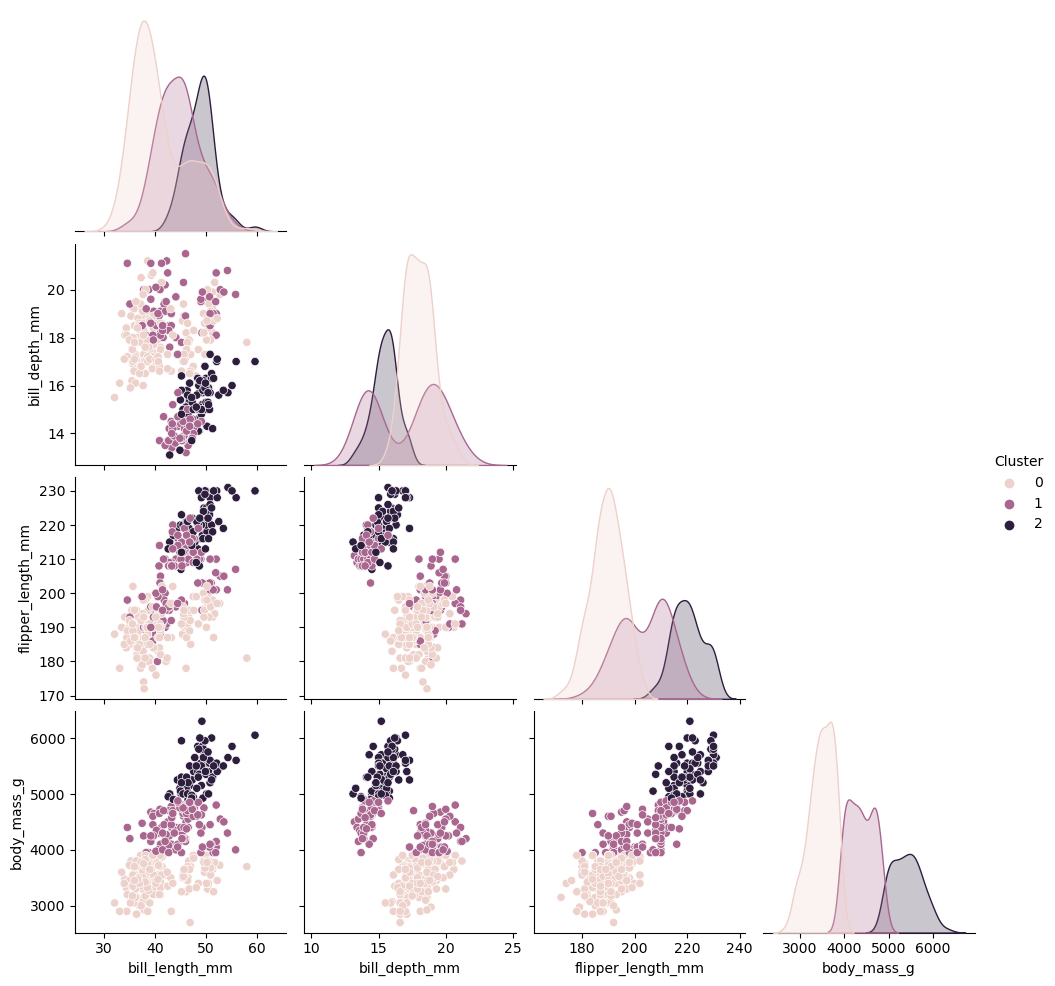

In [21]:
sns.pairplot(df, hue='Cluster', corner=True)

# Testando com 5 Grupos


In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5)
# Aqui que é feito o treinamento ( fit recebe o 'X' que são os valores em análise para se chegar nos 3 grupos)
kmeans.fit(X)

KMeans(n_clusters=5)

In [23]:
kmeans.cluster_centers_

array([[  17.56478873,   39.52676056, 3239.43661972,  187.95774648],
       [  15.2530303 ,   45.88636364, 4837.12121212,  212.42424242],
       [  18.38617021,   42.42446809, 3728.72340426,  191.45744681],
       [  15.79795918,   49.93877551, 5592.85714286,  222.14285714],
       [  17.8765625 ,   44.38125   , 4239.0625    ,  200.9375    ]])

In [24]:
# Inluir a coluna de Cluster
df['Cluster5'] = kmeans.labels_
df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Cluster,Cluster5
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0,2
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0,0


In [25]:
dg=df.groupby('Cluster5').count().reset_index(inplace=True)

In [26]:
dg

In [27]:
df.groupby(['Cluster','Cluster5']).count()

species  island  bill_length_mm  bill_depth_mm  \
Cluster Cluster5                                                   
0       0              71      71              71             71   
        2              83      83              83             83   
1       1              41      41              41             41   
        2              11      11              11             11   
        4              64      64              64             64   
2       1              25      25              25             25   
        3              49      49              49             49   

                  flipper_length_mm  body_mass_g  sex  
Cluster Cluster5                                       
0       0                        71           71   68  
        2                        83           83   82  
1       1                        41           41   38  
        2                        11           11   11  
        4                        64           64   60  
2       1                        25           25   25  
        3                        49           49   49

In [28]:
df.groupby(['Cluster','Cluster5'])['sex'].count()

Cluster  Cluster5
0        0           68
         2           82
1        1           38
         2           11
         4           60
2        1           25
         3           49
Name: sex, dtype: int64

In [29]:
h=df.groupby(['Cluster','Cluster5'])['sex'].count().reset_index()

In [30]:
# Uma nova abertura de Classe com 5 clusters sendo visualizada pelo grupo de 3 Clusters
h.style.background_gradient(cmap='plasma', axis=0)

,Cluster,Cluster5,sex
0,0,0,68
1,0,2,82
2,1,1,38
3,1,2,11
4,1,4,60
5,2,1,25
6,2,3,49


In [31]:
# Uma nova abertura de Classe com 5 clusters sendo visualizada pelo grupo de 3 Clusters
h.style.background_gradient(cmap='tab20c_r', axis=0)

,Cluster,Cluster5,sex
0,0,0,68
1,0,2,82
2,1,1,38
3,1,2,11
4,1,4,60
5,2,1,25
6,2,3,49


In [32]:
i=df.groupby(['Cluster5','Cluster'])['sex'].count().reset_index()

In [33]:
# Uma nova abertura de Classe com 5 clusters sendo visualizada pelo grupo de 3 Clusters
i.style.background_gradient(cmap='plasma', axis=0)

,Cluster5,Cluster,sex
0,0,0,68
1,1,1,38
2,1,2,25
3,2,0,82
4,2,1,11
5,3,2,49
6,4,1,60


In [34]:
sns.plotting_context()

{'font.size': 10.0,
 'axes.labelsize': 'medium',
 'axes.titlesize': 'large',
 'xtick.labelsize': 'medium',
 'ytick.labelsize': 'medium',
 'legend.fontsize': 'medium',
 'legend.title_fontsize': None,
 'axes.linewidth': 0.8,
 'grid.linewidth': 0.8,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 0.8,
 'ytick.major.width': 0.8,
 'xtick.minor.width': 0.6,
 'ytick.minor.width': 0.6,
 'xtick.major.size': 3.5,
 'ytick.major.size': 3.5,
 'xtick.minor.size': 2.0,
 'ytick.minor.size': 2.0}

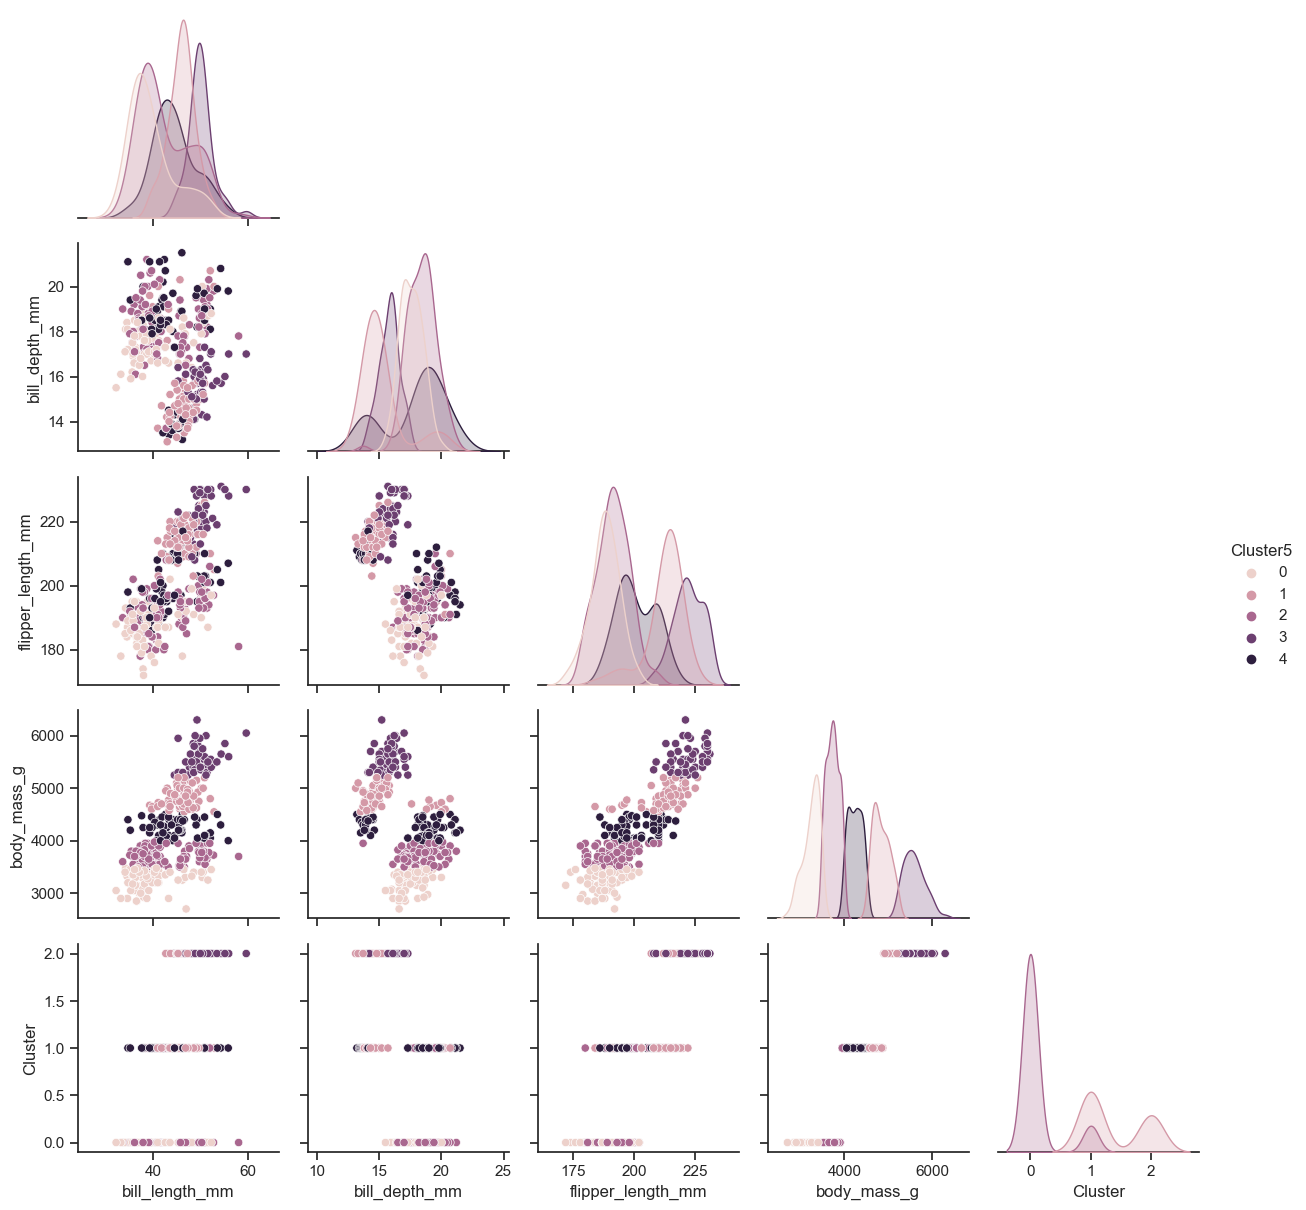

In [35]:
#sns.set_theme(style="whitegrid", palette="pastel")
"""
custom_params=
{'font.size': 10.0,
 'axes.labelsize': 'medium',
 'axes.titlesize': 'large',
 'xtick.labelsize': 'medium',
 'ytick.labelsize': 'medium',
 'legend.fontsize': 'medium',
 'legend.title_fontsize': None,
 'axes.linewidth': 0.8,
 'grid.linewidth': 0.8,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 0.8,
 'ytick.major.width': 0.8,
 'xtick.minor.width': 0.6,
 'ytick.minor.width': 0.6,
 'xtick.major.size': 3.5,
 'ytick.major.size': 3.5,
 'xtick.minor.size': 2.0,
 'ytick.minor.size': 2.0}
 """
custom_params = {"axes.spines.right": False
                 ,"axes.spines.top": False
                 ,'font.size': 25.0
                 ,'lines.linewidth': 10
                }
sns.set_theme(style="ticks", rc=custom_params)
sns.plotting_context("talk")
sns.pairplot(df, hue='Cluster5', corner=True)

Text(0.5, 1.0, 'Conhecendo os grupos')

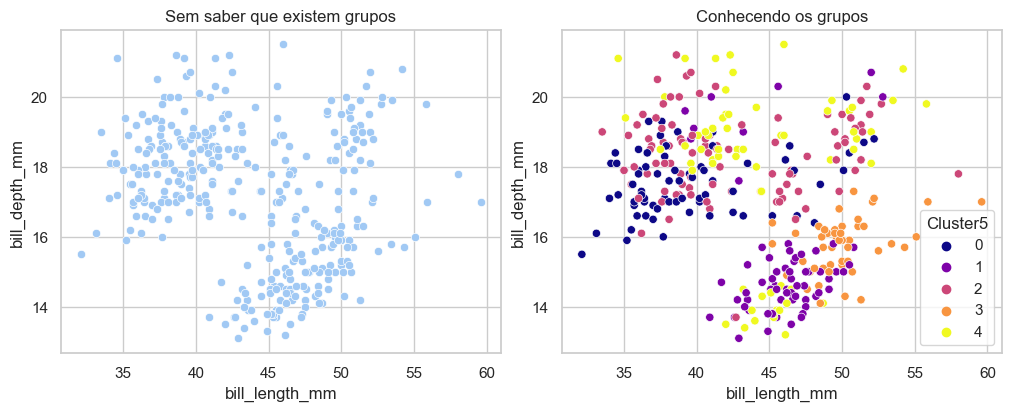

In [36]:
# Mostrar os dois gráficos uma ao lado do outro, um sem o hue para mostrar que não teria como adivinhar os grupos
sns.set_theme(style="whitegrid", palette="pastel")
fig, g = plt.subplots(ncols=2, figsize=(10, 4), layout='constrained')

# Gráfico da esquerda
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', ax=g[0])
g[0].set_title('Sem saber que existem grupos')
# Gráfico da direita
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', palette='plasma'
                ,hue='Cluster5', ax=g[1])
g[1].set_title('Conhecendo os grupos')

In [37]:
# Conclusão: 
"""
Não fez muito sentido porque foi misturado colunas que aparentemente não eram importantes. 
Os grupos praticamente seguiram por uma divisão do peso do penguin.
"""

'\nNão fez muito sentido porque foi misturado colunas que aparentemente não eram importantes. \nOs grupos praticamente seguiram por uma divisão do peso do penguin.\n'

In [38]:
# Testar uma paleta de cores criada com as 5 categorias
# Make a custom palette with gendered colors
pal = dict(a="#d30000", b="#ffa500", c="#a1ff00", d="#00a13d", e="#001cdd")

# Make a custom palette with gendered colors
#pal = dict(male="#6495ED", female="#F08080")

In [39]:
pal

{'a': '#d30000',
 'b': '#ffa500',
 'c': '#a1ff00',
 'd': '#00a13d',
 'e': '#001cdd'}

In [40]:
# Só funciona com campo string... convertendo

In [41]:
df['Cluster5'] = df['Cluster5'].apply(str)

In [42]:
pal = dict('0'="#d30000", '1'="#ffa500", '2'="#a1ff00", '3'="#00a13d", '4'="#001cdd")


SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (3481137362.py, line 1)

In [ ]:
df.dtypes

In [ ]:
pal